# Applying Gradient Descent - Lab

## Introduction

In the last lesson, we derived the functions that we help us descend along our cost functions efficiently.  Remember that this technique is not so different from what we saw with using the derivative to tell us our next step size and direction in two dimensions.  

![](./images/slopes.png)

When descending along our cost curve in two dimensions, we used the slope of the tangent line at each point, to tell us how large of a step to take next.  And with the cost curve being a function of $m$ and $b$, we had to use the gradient to determine each step.  

<img src="./images/new_gradientdescent.png" width="600">

But really it's an analogous approach.  Just like we can calculate the use derivative of a function $f(x)$ to calculate the slope at a given value of $x$ on the graph and thus our next step.  Here, we calculated the partial derivative with respect to both variables, our slope and y-intercept, to calculate the amount to move next in either direction and thus to steer us towards our minimum.   

## Objectives

You will be able to:
* Create functions to perform a simulation of gradient descent for an actual dataset
* Represent RSS as a multivariable function and take partial derivatives to perform gradient descent

## Reviewing our gradient descent formulas

Luckily for us, we already did the hard work of deriving these formulas.  Now we get to see the fruit of our labor.  The following formulas tell us how to update regression variables of $m$ and $b$ to approach a "best fit" line.   

- $ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x_i(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$ 
- $ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $

Now the formulas above tell us to take some dataset, with values of $x$ and $y$, and then given a regression formula with values $m$ and $b$, iterate through our dataset, and use the formulas to calculate an update to $m$ and $b$.  So ultimately, to descend along the cost function, we will use the calculations:

`current_m` = `old_m` $ -  (-2*\sum_{i=1}^n x_i*\epsilon_i )$

`current_b` =  `old_b` $ - ( -2*\sum_{i=1}^n \epsilon_i )$

Ok let's turn this into code.  First, let's initialize our data like we did before:

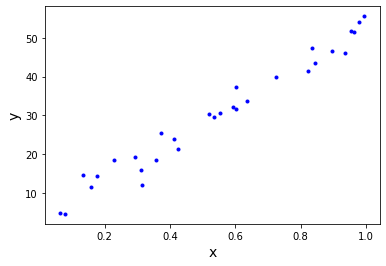

In [1]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50* x + y_randterm

data = np.array([y, x])
data = np.transpose(data)

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

Now

- Let's set our initial regression line by initializing $m$ and $b$ variables as zero.  Store them in `b_current` and `m_current`.
- Let's next initialize updates to these variables by setting the variables, `update_to_b` and `update_to_m` equal to 0.
- Define an `error_at` function which returns the error $\epsilon_i$ for a given $i$. The parameters are:
> point: a row of the particular data set  
> $b$: the intercept term  
> $m$: the slope  

- Them, use this `error_at` function to iterate through each of the points in the dataset, and at each iteration change our `update_to_b` by $2*\epsilon$ and change our `update_to_m` by $2*x*\epsilon$.

In [2]:
# initial variables of our regression line
b_current = 0
m_current = 0

#amount to update our variables for our next step

update_to_b = 0
update_to_m = 0

# Define the error_at function
def error_at(point, b, m):
    return (point[0] - (m * point[1] + b))

# iterate through data to change update_to_b and update_to_m
for i in range(0, len(data)):
    update_to_b += -2*(error_at(data[i], b_current, m_current))
    update_to_m += -2*(error_at(data[i], b_current, m_current))*data[i][1]

# Create new_b and new_m by subtracting the updates from the current estimates
new_b = b_current - update_to_b
new_m = m_current - update_to_m

In the last two lines of the code above, we calculate our `new_b` and `new_m` values by updating our taking our current values and adding our respective updates.  We define a function called `error_at`, which we can use in the error component of our partial derivatives above.

The code above represents **just one** update to our regression line, and therefore just one step towards our best fit line.  We'll just repeat the process to take multiple steps.  But first, we have to make a couple of other changes. 

## Tweaking our approach 

Ok, the above code is very close to what we want, but we just need to make tweaks to our code before it's perfect.

The first one is obvious if we think about what these formulas are really telling us to do.  Look at the graph below, and think about what it means to change each of our $m$ and $b$ variables by at least the sum of all of the errors, of the $y$ values that our regression line predicts and our actual data.  That would be an enormous change.  To ensure that we drastically updating our regression line with each step, we multiply each of these partial derivatives by a learning rate.  As we have seen before, the learning rate is just a small number, like $.
01$ which controls how large our updates to the regression line will be.  The learning rate is  represented by the Greek letter eta, $\eta$, or alpha $\alpha$.  We'll use eta, so $\eta = .01$ means the learning rate is $.01$.

Multiplying our step size by our learning rate works fine, so long as we multiply both of the partial derivatives by the same amount.  This is because without gradient,  $ \nabla J(m,b)$, we think of as steering us in the correct direction.  In other words, our derivatives ensure we are making the correct **proportional** changes to $m$ and $b$.  So scaling down these changes to make sure we don't update our regression line too quickly works fine, so long as we keep me moving in the correct direction.  While we're at it, we can also get rid of multiplying our partials by 2.  As mentioned, so long as our changes are proportional we're in good shape. 

For our second tweak, note that in general the larger the dataset, the larger the sum of our errors would be.  But that doesn't mean our formulas are less accurate, and there deserve larger changes.  It just means that the total error is larger.  But we should really think accuracy as being proportional to the size of our dataset.  We can correct for this effect by dividing the effect of our update by the size of our dataset, $n$.

Make these changes below:

In [3]:
#amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

# define learning rate and n
learning_rate = 0.01
n = len(data)

# create update_to_b and update_to_m
for i in range(0, len(data)):
    update_to_b += -2*(error_at(data[i], b_current, m_current))
    update_to_m += -2*(error_at(data[i], b_current, m_current))*data[i][1]
    
# create new_b and new_m
new_b = b_current - (learning_rate * update_to_b)
new_m = m_current - (learning_rate * update_to_m)

So our code now reflects what we know about our gradient descent process.  Start with an initial regression line with values of $m$ and $b$.  Then for each point, calculate how the regression line fares against the actual point (that is, find the error).  Update what the next step to the respective variable should be by using the partial derivative.  And after iterating through all of the points, update the value of $b$ and $m$ appropriately, scaled down by a learning rate.

## Seeing our gradient descent formulas in action

As mentioned earlier, the code above represents just one update to our regression line, and therefore just one step towards our best fit line.  To take multiple steps we wrap the process we want to duplicate in a function called `step_gradient` and then can call that function as much as we want. With this function:

- Include a learning_rate of 0.1
- Return a tuple of (b,m)  
The parameters should be:
> b_current : the starting value of b   
> m_current : the starting value of m   
> points : the number of points at which we want to check our gradient 

See if you can use your `error_at` function within the `step_gradient` function!

In [4]:
def step_gradient(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    learning_rate = .1
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i][1]
        y = points[i][0]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y -  (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return (new_b, new_m)

Now let's initialize `b` and `m` as 0 and run a first iteration of the `step_gradient` function.

In [12]:
b = m = 0
step = step_gradient(b, m, data)
step
# b= 3.02503, m= 2.07286

(3.0250308395837813, 2.0728619246505193)

So just looking at input and output, we begin by setting $b$ and $m$ to 0 and 0.  Then from our step_gradient function, we receive new values of $b$ and $m$ of 3.02503 and 2.0728.  Now what we need to do, is take another step in the correct direction by calling our step gradient function with our updated values of $b$ and $m$.

In [14]:
next_step = step_gradient(step[0], step[1], data)
# b = 5.63489, m= 3.902265
next_step

(5.634896312558807, 3.902265648903966)

Let's do this, say, 1000 times.

In [15]:
b_values = []
m_values = []
for i in range(0, 1000):
    step = step_gradient(b, m, data)
    b = step[0]
    m = step[1]
    b_values.append(b)
    m_values.append(m)

Let's take a look at the estimates in the last iteration.

In [16]:
b_values 

[3.0250308395837813,
 5.634896312558807,
 7.884345171519152,
 9.820920294267818,
 11.485907009550733,
 12.915156619426247,
 14.139801542875658,
 15.186876343718733,
 16.0798570288238,
 16.839129372557856,
 17.482395607898194,
 18.025027595391315,
 18.48037351368167,
 18.86002418835148,
 19.174044370826213,
 19.431173580052743,
 19.639000512607243,
 19.804114499729806,
 19.932237031999197,
 20.028335974823563,
 20.0967247527028,
 20.14114848043059,
 20.164858759069432,
 20.17067862845862,
 20.161058971693627,
 20.1381274965307,
 20.103731270622212,
 20.05947365892371,
 20.00674639996872,
 19.946757460755236,
 19.880555225795167,
 19.80904950276514,
 19.733029763706508,
 19.65318098558706,
 19.570097406157934,
 19.484294469461116,
 19.39621919923661,
 19.306259207124032,
 19.21475051532502,
 19.121984349748228,
 19.028213039125525,
 18.933655137757196,
 18.838499874059735,
 18.742911013643383,
 18.6470302139697,
 18.55097993749939,
 18.454865981434878,
 18.358779674515485,
 18.2627997846

In [17]:
m_values

[2.0728619246505193,
 3.902265648903966,
 5.5200596577756995,
 6.953902303201383,
 8.227813233586371,
 9.362652253147472,
 10.3765351615667,
 11.285194867591269,
 12.102294978739781,
 12.839702121442453,
 13.507722422849499,
 14.115306870770379,
 14.670229647501909,
 15.179242994285609,
 15.648211695053913,
 16.0822298616453,
 16.485722349683147,
 16.86253282778208,
 17.216000256555166,
 17.549025302736702,
 17.864128012997963,
 18.16349789771379,
 18.449037423559545,
 18.722399782361524,
 18.98502168946767,
 19.238151865772664,
 19.482875771444856,
 19.72013708464523,
 19.950756353609776,
 20.175447194091262,
 20.3948303552003,
 20.609445934172285,
 20.819763983668498,
 21.02619372315969,
 21.2290915381001,
 21.428767926423046,
 21.625493530894328,
 21.819504377627865,
 22.011006425235344,
 22.200179515332877,
 22.387180803188084,
 22.57214773692288,
 22.755200644683494,
 22.93644498137048,
 23.115973279731666,
 23.293866844724747,
 23.470197224935987,
 23.64502749039501,
 23.81841334

As you can see, our  m  and  b  values both update with each step. Not only that, but with each step, the size of the changes to  m and  b  decrease. This is because they are approaching a best fit line.

## Let's include 2 predictors, $x_1$ and $x_2$

Below, we generated a problem where we have 2 predictors. We generated data such that the best fit line is around $\hat y = 3x_1 -4x_2 +2$, noting that there is random noise introduced, so the final result will never be exactly that. Let's build what we built previously, but now create a `step_gradient_multi` function that can take an *arbitrary* number of predictors (so the function should be able to include more than 2 predictors as well). Good luck!

In [18]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

x1 = np.random.rand(100,1).reshape(100)
x2 = np.random.rand(100,1).reshape(100)
y_randterm = np.random.normal(0,0.2,100)
y = 2+ 3* x1+ -4*x2 + y_randterm

data = np.array([y, x1, x2])
data = np.transpose(data)

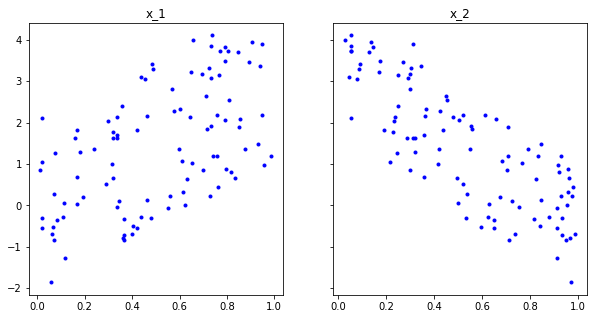

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax1.set_title('x_1')
ax1.plot(x1, y, '.b')
ax2.set_title('x_2')
ax2.plot(x2, y, '.b');

Note that, for our gradients, when having multiple predictors $x_j$ with $j \in 1,\ldots, k$

$$ \frac{dJ}{dm_j}J(m_j,b) = -2\sum_{i = 1}^n x_{j,i}(y_i - (\sum_{j=1}^km{x_{j,i}} + b)) = -2\sum_{i = 1}^n x_{j,i}*\epsilon_i$$
$$ \frac{dJ}{db}J(m_j,b) = -2\sum_{i = 1}^n(y_i - (\sum_{j=1}^km{x_{j,i}} + b)) = -2\sum_{i = 1}^n \epsilon_i $$
    

So we'll have one gradient per predictor along with the gradient for the intercept!

Create the `step_gradient_multi` function below. As we said before, this means that we have more than one feature that we are using as an independent variable in the regression. This function will have the same inputs as `step_gradient`, but it will be able to handle having more than one value for m. It should return the final values for b and m in the form of a tuple.

- `b_current` refers to the y-intercept at the current step
- `m_current` refers to the slope at the current step
- `points` are the data points to which we want to fit a line

You might have to refactor your `error` at function if you want to use it with multiple m values.

In [21]:
def step_gradient_multi(b_current, m_current ,points):
    b_gradient = 0
    m_gradient = np.zeros(len(m_current))
    learning_rate = .1
    N = float(len(points))
    for i in range(0, len(points)):
        y = points[i][0]
        x = points[i][1:(len(m_current)+1)] 
        b_gradient += -(1/N)  * (y -  (sum(m_current * x) + b_current))
        m_gradient += -(1/N) * x * (y -  (sum(m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return (new_b, new_m)

Apply 1 step to our data

In [22]:
b = 0
m = [0,0]
updated_b, updated_m = step_gradient_multi(b, m, data)

Apply 500 steps to our data

In [23]:
updated_bs = []
updated_ms = []
for i in range(0, 500):
    step = step_gradient_multi(b, m, data)
    b = step[0]
    m = step[1]
    updated_bs.append(b)
    updated_ms.append(m)

Look at the last step

In [24]:
updated_bs

[0.13965491088061555,
 0.2585452879764812,
 0.3599175391600748,
 0.44650939119938643,
 0.5206296031134438,
 0.5842251879134785,
 0.6389381002494323,
 0.6861530407250361,
 0.7270377689590364,
 0.7625770993222477,
 0.7936015693174638,
 0.8208116154347861,
 0.8447979604910698,
 0.8660588061393075,
 0.8850143311992165,
 0.9020189180048921,
 0.9173714628044636,
 0.9313240704536286,
 0.9440893865950277,
 0.9558467808385429,
 0.9667475609983587,
 0.9769193702266669,
 0.9864698950895713,
 0.9954899925651475,
 1.0040563270224343,
 1.012233593970611,
 1.020076395334222,
 1.0276308208626366,
 1.0349357817244604,
 1.042024135121158,
 1.0489236326685611,
 1.0556577201629955,
 1.0622462120210385,
 1.0687058600323673,
 1.0750508329875308,
 1.0812931211471224,
 1.0874428773301938,
 1.093508704554081,
 1.099497898601378,
 1.1054166525772589,
 1.111270229413499,
 1.117063107342145,
 1.122799102574654,
 1.128481472758541,
 1.1341130042238134,
 1.1396960855594214,
 1.14523276966189,
 1.1507248260626006,
 

In [25]:
updated_ms

[array([0.093847, 0.038762]),
 array([0.176423, 0.066182]),
 array([0.249466, 0.084080]),
 array([0.314438, 0.093990]),
 array([0.372575, 0.097206]),
 array([0.424919, 0.094817]),
 array([0.472348, 0.087743]),
 array([0.515603, 0.076757]),
 array([0.555311, 0.062515]),
 array([0.591997, 0.045565]),
 array([0.626109, 0.026371]),
 array([0.658020, 0.005325]),
 array([0.688049, -0.017245]),
 array([0.716463, -0.041061]),
 array([0.743487, -0.065889]),
 array([0.769312, -0.091534]),
 array([0.794100, -0.117829]),
 array([0.817987, -0.144635]),
 array([0.841087, -0.171836]),
 array([0.863498, -0.199332]),
 array([0.885301, -0.227040]),
 array([0.906567, -0.254892]),
 array([0.927354, -0.282829]),
 array([0.947712, -0.310802]),
 array([0.967683, -0.338771]),
 array([0.987303, -0.366700]),
 array([1.006603, -0.394561]),
 array([1.025609, -0.422331]),
 array([1.044341, -0.449990]),
 array([1.062820, -0.477521]),
 array([1.081062, -0.504911]),
 array([1.099079, -0.532148]),
 array([1.116884, -0

## Level up - optional

Try your own gradient descent algorithm on the Boston Housing data set, and compare with the result from scikit learn!
Be careful to test on a few continuous variables at first, and see how you perform. Scikit learn has built-in "regularization" parameters to make optimization more feasible for many parameters.

## Summary

In this section, we saw our gradient descent formulas in action.  The core of the gradient descent functions is understanding the two lines: 

$$ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$$
$$ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $$
    
Which both look to the errors of the current regression line for our dataset to determine how to update the regression line next.  These formulas came from our cost function, $J(m,b) = \sum_{i = 1}^n(y_i - (mx_i + b))^2 $, and using the gradient to find the direction of steepest descent.  Translating this into code, and seeing how the regression line continued to improve in alignment with the data, we saw the effectiveness of this technique in practice. Additionally, we saw how you can extend the gradient descent algorithm to multiple predictors.